In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-behaviour-dataset/customer_segmentation_mixed.csv


# **1. Introduction & Objective**

The primary objective of this project is to analyze customer demographics and their purchasing behaviors. By exploring the relationships between age, annual income, and spending habits, we aim to identify key customer segments and trends that can help drive data-driven business decisions.

In [3]:
df = pd.read_csv("/kaggle/input/customer-behaviour-dataset/customer_segmentation_mixed.csv")
df.head(3)

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                350 non-null    int64 
 1   Annual_Income      350 non-null    int64 
 2   Spending_Score     350 non-null    int64 
 3   Monthly_Visits     350 non-null    int64 
 4   Gender             350 non-null    object
 5   Preferred_Product  350 non-null    object
dtypes: int64(4), object(2)
memory usage: 16.5+ KB


In [5]:
df.describe()

,Age,Annual_Income,Spending_Score,Monthly_Visits
count,350.000000,350.000000,350.000000,350.000000
mean,41.202857,71213.274286,49.571429,9.522857
std,13.422450,29311.239749,29.602801,5.584290
min,18.000000,20412.000000,1.000000,1.000000
25%,30.000000,45981.750000,24.000000,5.000000
50%,42.000000,71990.500000,51.000000,9.000000
75%,52.000000,97945.500000,75.000000,14.000000
max,64.000000,119835.000000,99.000000,19.000000


In [24]:
#Check null values
df.isnull().sum()

Age                  0
Annual_Income        0
Spending_Score       0
Monthly_Visits       0
Gender               0
Preferred_Product    0
Aged_group           8
dtype: int64

In [25]:
#Check how many rows and columns contain in dataset
df.shape

(350, 7)

# 2. Dataset Overview****
The dataset contains information on 350 customers. The key features included in this analysis are:

Preferred_Product
Clothing       3326
Electronics    3598
Groceries      2884
Home           3425
Sports         4117
Name: Spending_Score, dtype: int64
Gender
Female    7965
Male      9385
Name: Spending_Score, dtype: int64


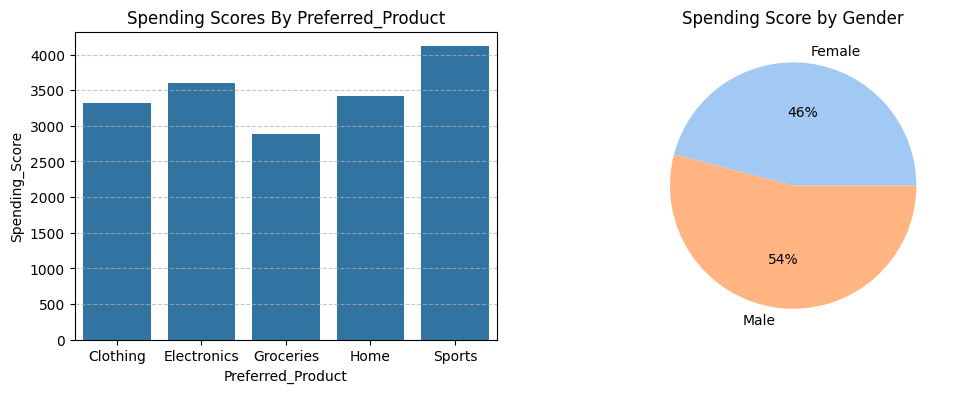

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

p_product_by_score = df.groupby('Preferred_Product')['Spending_Score'].sum()
score_by_gender = df.groupby('Gender')['Spending_Score'].sum()
print(p_product_by_score)
print(score_by_gender)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

sns.barplot(data=p_product_by_score)
plt.title("Spending Scores By Preferred_Product")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1,2,2)
colors = sns.color_palette('pastel')
plt.pie(score_by_gender, labels=score_by_gender.index, autopct='%.0f%%', colors=colors)
plt.title("Spending Score by Gender")
plt.show()

In [9]:
df.head()

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics


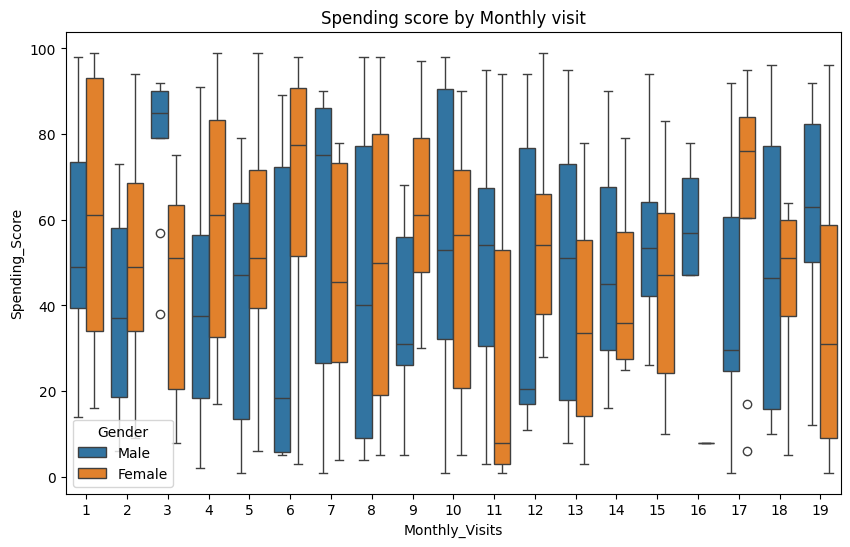

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Monthly_Visits'],y=df['Spending_Score'], hue='Gender', data=df)
plt.title("Spending score by Monthly visit")
plt.show()

In [18]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bins = np.linspace(df['Age'].min(),df['Age'].max(), num=4)
labels = ['Young', 'Middle', 'Old']

df['Aged_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product,Aged_group
0,56,26102,85,6,Female,Clothing,Old
1,46,70336,75,18,Male,Home,Middle
2,32,105314,36,10,Male,Groceries,Young
3,60,46641,99,5,Female,Electronics,Old
4,25,54584,19,10,Male,Electronics,Young


Preferred_Product
Clothing        9.416667
Electronics     8.925373
Groceries       9.836066
Home            9.268657
Sports         10.072289
Name: Monthly_Visits, dtype: float64


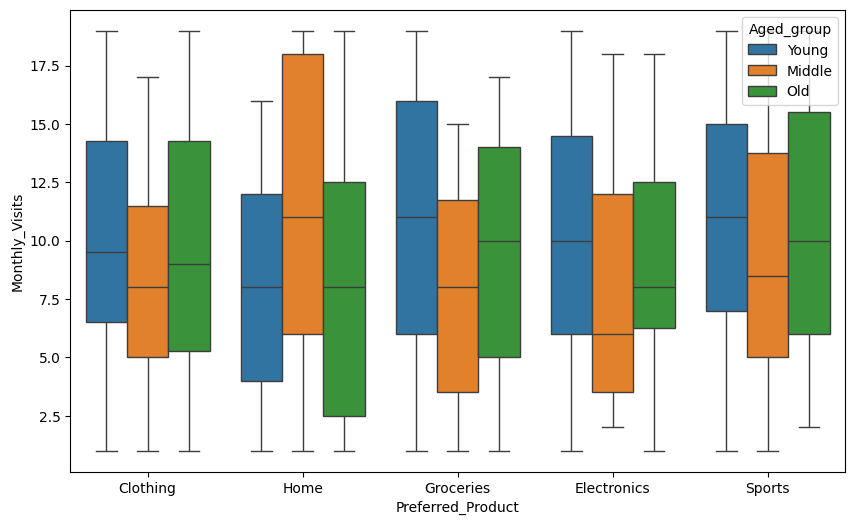

In [21]:
plt.figure(figsize=(10,6))
mth_vis_by_product = df.groupby('Preferred_Product')['Monthly_Visits'].mean()
print(mth_vis_by_product)

sns.boxplot(x=df['Preferred_Product'], y=df['Monthly_Visits'],data=df,hue='Aged_group')
plt.show()

In [ ]:
df['Monthly_Visits'].unique()

Aged_group
Young     5035
Middle    5078
Old       6907
Name: Spending_Score, dtype: int64
Aged_group
Young     71858.336538
Middle    75112.527273
Old       66275.171875
Name: Annual_Income, dtype: float64


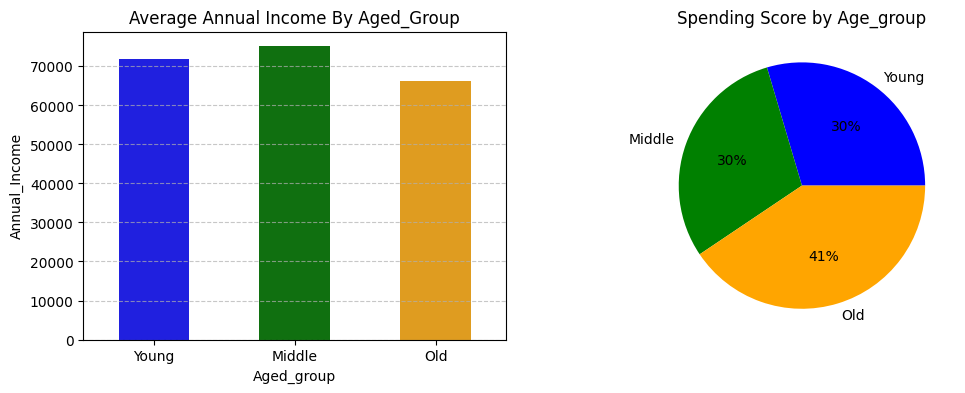

In [19]:
age_group_score = df.groupby('Aged_group')['Spending_Score'].sum()
income_age_group = df.groupby('Aged_group')['Annual_Income'].mean()
print(age_group_score)
print(income_age_group)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

sns.barplot(data=income_age_group, width=0.5, palette=['blue', 'green', 'orange'])
plt.title("Average Annual Income By Aged_Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1,2,2)
plt.pie(age_group_score,labels=age_group_score.index,autopct='%.0f%%',colors=['blue', 'green', 'orange'])
plt.title("Spending Score by Age_group")
plt.show()

In [ ]:
corr_df = df[['Age','Annual_Income','Monthly_Visits','Spending_Score']]
correlation_metrix = corr_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_metrix,annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

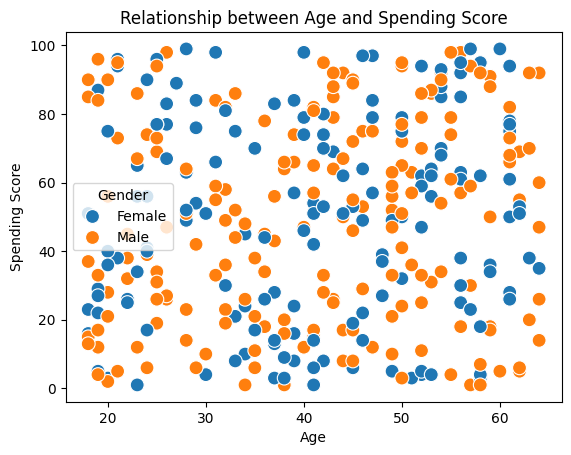

In [26]:
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='Gender', s=100)

plt.title('Relationship between Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()

# 3.Executive Summary 

# 1. Key FindingsWeak

Correlation between Income and Spending: There is no significant statistical relationship ($r = 0.04$) between a customer's Annual Income and their Spending Score, suggesting that high earners are not necessarily the highest spenders in this dataset.

Age as a Minor Influence: Age shows a slight positive correlation ($r = 0.12$) with Spending Score, indicating that older customers in this specific group tend to have slightly higher spending habits than younger ones.

Gender Distribution: The customer base is relatively balanced, with Males (54%) slightly outnumbering Females (46%).

Product Performance: The Sports and Electronics categories appear to drive the highest aggregate spending scores compared to other categories like Groceries.

# 2. Customer Engagement (Monthly Visits)

The analysis of Monthly Visits shows that frequent store visits are not strictly tied to income levels ($r = -0.02$), meaning engagement is driven by factors other than wealth.

# 3. Strategic Recommendations

Targeted Marketing: Since income does not dictate spending, marketing campaigns should focus on lifestyle and age-based preferences rather than just high-income brackets.

Loyalty Programs: Given the lack of correlation between visits and spending, implementing a Loyalty Program could help convert frequent visitors (High Visits) into higher spenders (High Spending Score).

Product Focus: Increasing inventory and promotions in the Sports category may yield the highest return on investment, as it currently shows strong spending performance.